In [1]:
import glob
import imageio
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.segmentation import find_boundaries

from deepcell.applications import Mesmer
from deepcell.utils.plot_utils import create_rgb_image

from dataset import PolarisPublicationData

In [2]:
def plot_gene(df, gene, color, alpha=1, size=13):
    df_gene = df.loc[df.predicted_name == gene]
    plt.scatter(df_gene.y, df_gene.x, color=color, alpha=alpha, s=size)

In [3]:
data = PolarisPublicationData()

In [4]:
results, segmentation = data.load_data(figure='2')
segmentation.shape

(2048, 2048)

In [5]:
results.head()

,x,y,batch_id,cell_id,probability,spot_index,predicted_id,predicted_name,source,0,...,10,11,12,13,14,15,16,17,18,19
0,934,562,0,NaN,0.993991,566718,181,Adra2a,prediction,0.991280,...,0.001524,0.003100,0.004545,0.001207,0.002445,0.000841,0.910573,0.000113,0.975430,0.084282
1,1831,1511,0,NaN,0.998752,1254549,49,Neat1,prediction,0.013370,...,0.013003,0.005288,0.648071,0.062042,0.047652,0.983566,0.686564,0.021112,0.029134,0.155279
2,753,983,0,NaN,0.998973,369480,46,Net1,prediction,0.989261,...,0.141704,0.063122,0.002273,0.025444,0.225742,0.000867,0.005135,0.000254,0.001360,0.969382
3,804,214,0,NaN,1.000000,433124,46,Net1,prediction,0.989260,...,0.927054,0.000907,0.000842,0.000365,0.879924,0.002032,0.000193,0.000464,0.000772,0.983239
4,807,1472,0,NaN,0.999760,437627,49,Neat1,prediction,0.138695,...,0.009274,0.012637,0.625901,0.020994,0.041646,0.985035,0.089673,0.001944,0.859814,0.242743


In [6]:
cell_bounds = find_boundaries(segmentation)

colors = {
    'Slc51a': 'lightblue',
    'Ada': 'black',
    'Apob': 'mediumblue',
    'Slc5a1': 'dodgerblue',
    'Txndc5': 'orange',
    'Klk1': 'darkmagenta',
    'Krt7': 'darkmagenta',
    'C1qb': 'darkgreen',
    'H2-Eb1': 'darkgreen',
    'Ighd': 'yellowgreen',
    'Mzb1': 'yellowgreen',
    'Cd79a': 'yellowgreen',
    'Cd79b': 'yellowgreen',
    'Cd4': 'limegreen',
    'Cd8a': 'limegreen',
    'Mki67': 'coral',
    'Stmn1': 'coral',
    'Acta2': 'hotpink',
    'Nes': 'red',
    'Adgrf5': 'red',
    'Scarb1': 'red'
}

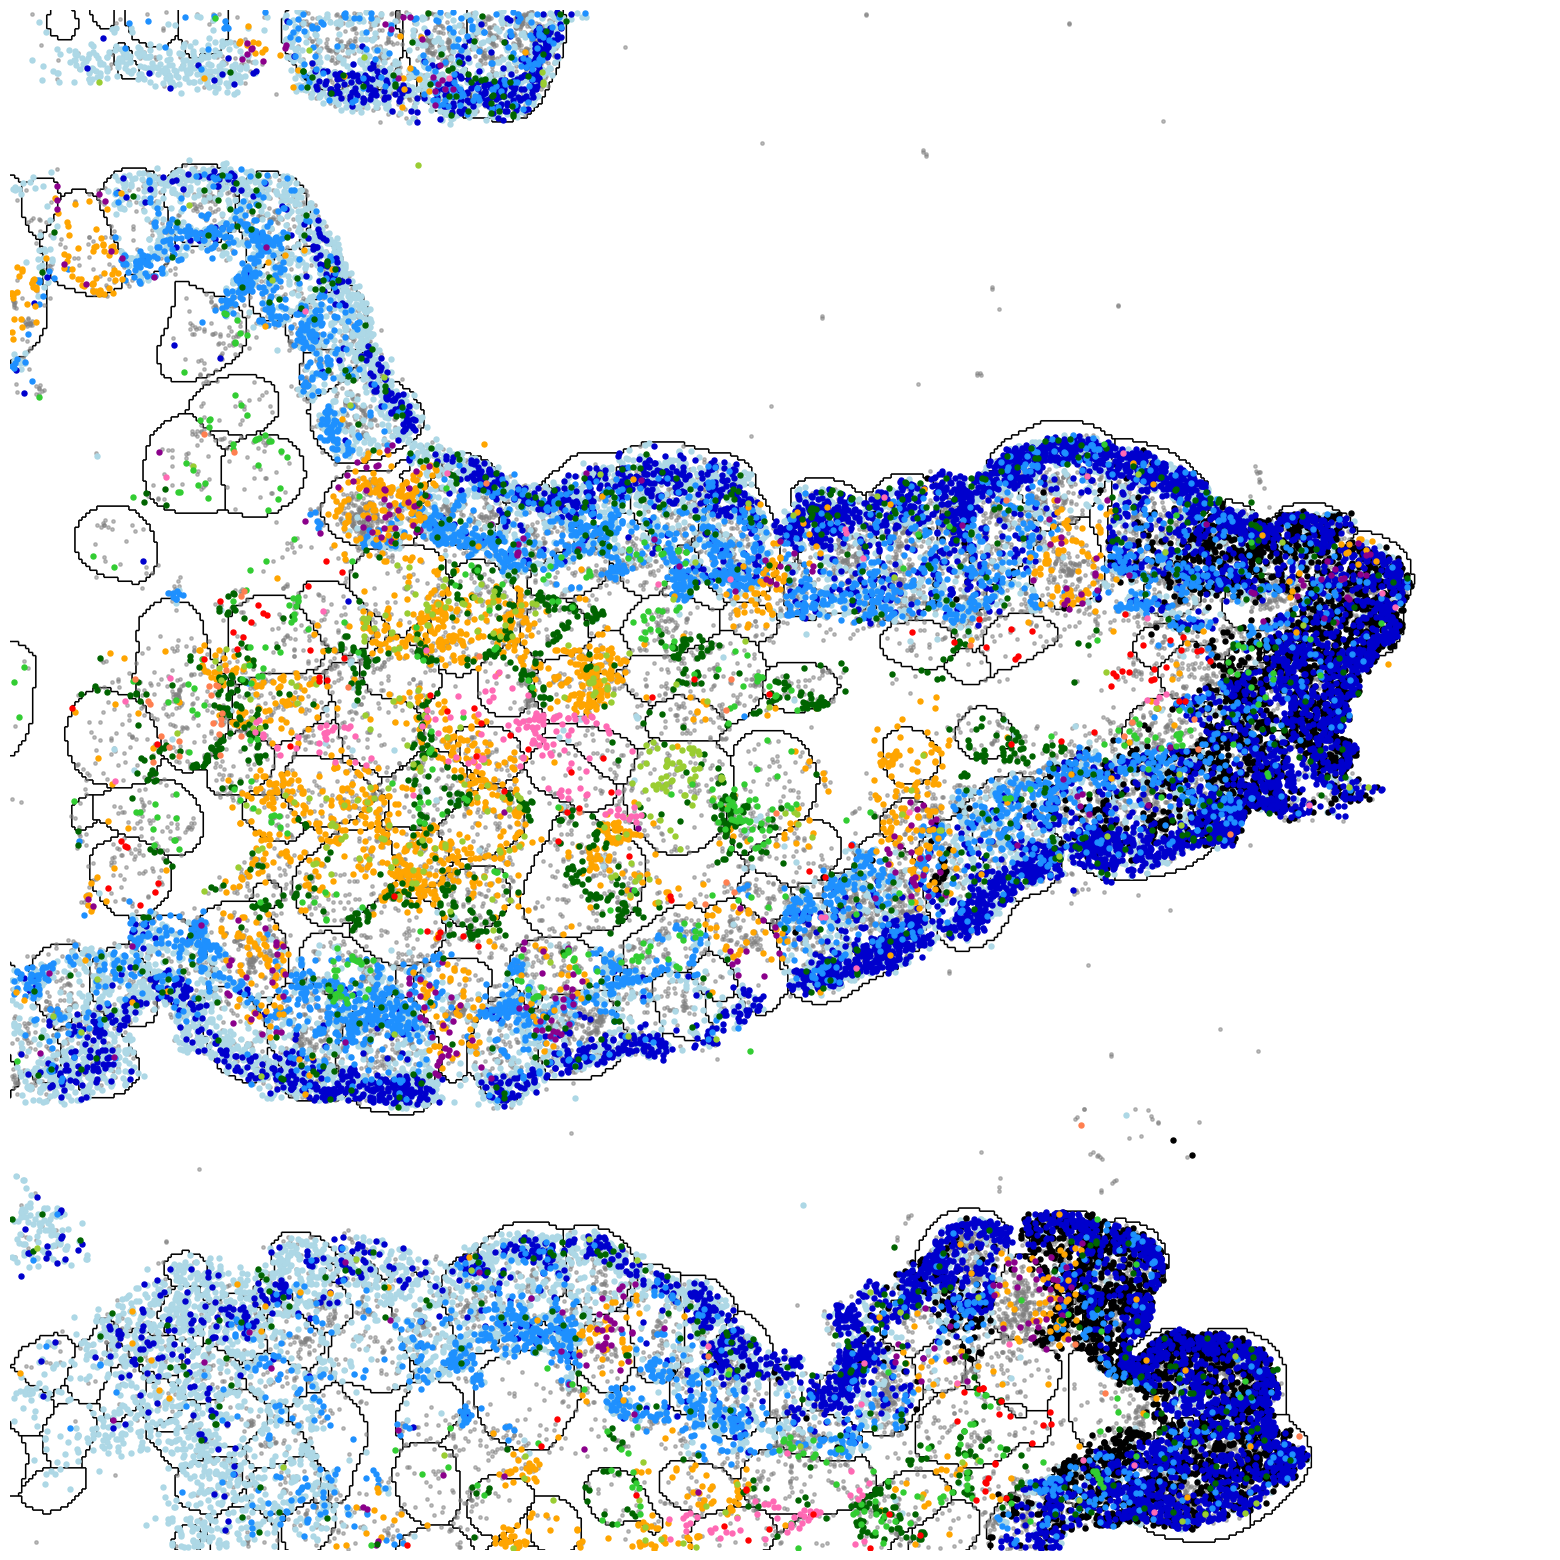

In [7]:
plt.figure(figsize=(20,20))
plt.scatter(results.y, results.x, color='gray', alpha=0.5, s=6)

# Enterocytes
plot_gene(results, 'Slc51a', colors['Slc51a'])
plot_gene(results, 'Ada', colors['Ada'])
plot_gene(results, 'Apob', colors['Apob'])
plot_gene(results, 'Slc5a1', colors['Slc5a1'])

# Endothelial + Goblet
plot_gene(results, 'Txndc5', colors['Txndc5'])

# Goblet
plot_gene(results, 'Klk1', colors['Klk1'])
plot_gene(results, 'Krt7', colors['Krt7'])

# Macrophage
plot_gene(results, 'C1qb', colors['C1qb'])
plot_gene(results, 'H2-Eb1', colors['H2-Eb1'])

# B cells
plot_gene(results, 'Ighd', colors['Ighd']) # Naive B-cell
plot_gene(results, 'Mzb1', colors['Mzb1']) # Plasma B-cell
plot_gene(results, 'Cd79a', colors['Cd79a']) # B-cell, general
plot_gene(results, 'Cd79b', colors['Cd79b']) # B-cell, general

# T cells
plot_gene(results, 'Cd4', colors['Cd4'])
plot_gene(results, 'Cd8a', colors['Cd8a'])

# Stem+TA
plot_gene(results, 'Mki67', colors['Mki67'])
plot_gene(results, 'Stmn1', colors['Stmn1'])

plot_gene(results, 'Acta2', colors['Acta2'])

# Endothelial
plot_gene(results, 'Nes', colors['Nes'])
plot_gene(results, 'Adgrf5', colors['Adgrf5'])
plot_gene(results, 'Scarb1', colors['Scarb1'])

plt.imshow(cell_bounds[40:-40,40:-40]*-1, cmap='gray')

plt.xticks([])
plt.yticks([])

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

In [8]:
cell_id = 27
diff = 20
df_cell = pd.DataFrame(columns=results.columns)
for i in range(len(results)):
    x = results.loc[i,'x']+40
    y = results.loc[i,'y']+40
    if segmentation[x,y]==cell_id:
        df_cell.loc[len(df_cell)] = results.loc[i]
        
color_list = []
size_list = []
alpha_list = []
for i in range(len(df_cell)):
    name = df_cell.loc[i, 'predicted_name']
    if name in colors:
        color_list.append(colors[name])
        size_list.append(60)
        alpha_list.append(1)
    else:
        color_list.append('gray')
        size_list.append(40)
        alpha_list.append(0.5)
        
df_cell['colors'] = color_list
df_cell['sizes'] = size_list
df_cell['alphas'] = alpha_list

df_cell

,x,y,batch_id,cell_id,probability,spot_index,predicted_id,predicted_name,source,0,...,13,14,15,16,17,18,19,colors,sizes,alphas
0,674,461,0,NaN,1.0,266500,1,Slc51a,prediction,0.00473,...,0.019534,0.005258,0.006755,0.130589,0.000092,0.00051,0.030784,lightblue,60,1.0
1,648,479,0,NaN,0.999725,231978,6,Klk1,prediction,0.014727,...,0.029142,0.002281,0.003789,0.904973,0.003658,0.000038,0.984961,darkmagenta,60,1.0
2,679,481,0,NaN,0.999979,273201,50,Slc5a1,prediction,0.050534,...,0.013234,0.013355,0.976734,0.031161,0.001642,0.006894,0.060549,dodgerblue,60,1.0
3,638,478,0,NaN,0.975341,218997,5,Txndc5,prediction,0.001437,...,0.020535,0.386709,0.00218,0.914379,0.001565,0.000207,0.00707,orange,60,1.0
4,672,456,0,NaN,0.999908,263840,50,Slc5a1,prediction,0.002967,...,0.00912,0.003247,0.978222,0.178327,0.000043,0.000182,0.009783,dodgerblue,60,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,653,513,8,NaN,0.999815,11005319,5,Txndc5,prediction,0.002656,...,0.007628,0.095047,0.000109,0.87394,0.000819,0.000313,0.005006,orange,60,1.0
475,607,467,8,NaN,0.999297,10951838,49,Neat1,prediction,0.000055,...,0.062138,0.04851,0.871326,0.094453,0.000574,0.00219,0.015935,gray,40,0.5
476,654,445,8,NaN,0.999958,11006540,49,Neat1,prediction,0.000084,...,0.000875,0.000033,0.227856,0.015881,0.000073,0.000032,0.001273,gray,40,0.5
477,607,470,8,NaN,0.958324,10951841,49,Neat1,prediction,0.000236,...,0.012198,0.015514,0.458724,0.583702,0.000086,0.003865,0.006853,gray,40,0.5


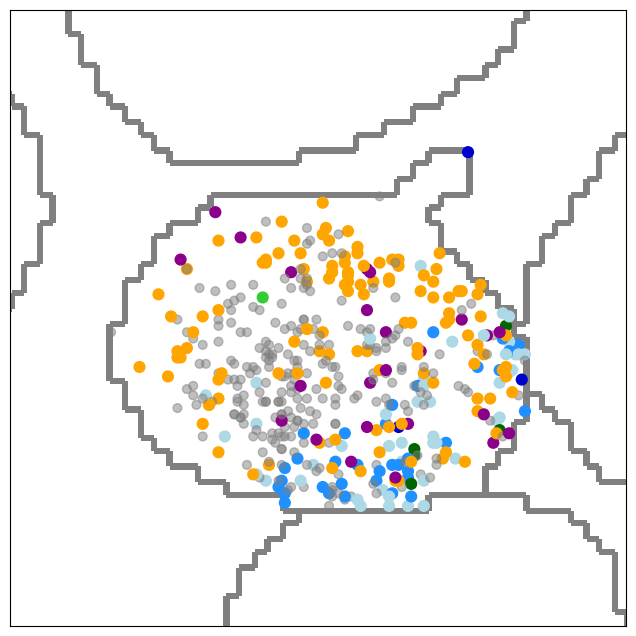

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(df_cell.y, df_cell.x, c=df_cell.colors, s=df_cell.sizes, alpha=df_cell.alphas)
plt.imshow(cell_bounds[40:-40,40:-40]*-1, cmap='gray', vmin=-2)
plt.xlim([560-195,560])
plt.ylim([725,725-195])
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
cell_id = 37
diff = 20
df_cell = pd.DataFrame(columns=results.columns)
for i in range(len(results)):
    x = results.loc[i,'x']+40
    y = results.loc[i,'y']+40
    if segmentation[x,y]==cell_id:
        df_cell.loc[len(df_cell)] = results.loc[i]
        
color_list = []
size_list = []
alpha_list = []
for i in range(len(df_cell)):
    name = df_cell.loc[i, 'predicted_name']
    if name in colors:
        color_list.append(colors[name])
        size_list.append(60)
        alpha_list.append(1)
    else:
        color_list.append('gray')
        size_list.append(40)
        alpha_list.append(0.5)
        
df_cell['colors'] = color_list
df_cell['sizes'] = size_list
df_cell['alphas'] = alpha_list

df_cell

,x,y,batch_id,cell_id,probability,spot_index,predicted_id,predicted_name,source,0,...,13,14,15,16,17,18,19,colors,sizes,alphas
0,715,1088,0,NaN,0.998678,321293,45,Apob,prediction,0.016449,...,0.015814,0.000351,0.985934,0.406184,0.962643,0.007691,0.008447,mediumblue,60,1.0
1,687,1042,0,NaN,0.999999,284367,1,Slc51a,prediction,0.088942,...,0.013141,0.000544,0.013155,0.018643,0.026106,0.004352,0.006957,lightblue,60,1.0
2,701,1090,0,NaN,0.978262,302911,167,Fzd5,prediction,0.13226,...,0.014803,0.000184,0.001448,0.012675,0.015431,0.00113,0.919097,gray,40,0.5
3,688,1014,0,NaN,0.99911,285669,152,Ptger3,prediction,0.981743,...,0.029354,0.000867,0.012759,0.969445,0.021664,0.00372,0.019548,gray,40,0.5
4,649,1080,0,NaN,0.992222,233907,2,Maoa,prediction,0.005327,...,0.034247,0.00019,0.006293,0.009222,0.362694,0.002241,0.911316,gray,40,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,746,1047,8,NaN,0.972127,11124633,45,Apob,prediction,0.000653,...,0.007546,0.001922,0.023396,0.008109,0.188554,0.000894,0.010119,mediumblue,60,1.0
778,747,1063,8,NaN,0.981479,11125941,50,Slc5a1,prediction,0.005041,...,0.018717,0.003089,0.199808,0.033088,0.003999,0.001327,0.004838,dodgerblue,60,1.0
779,740,1071,8,NaN,0.98818,11116879,45,Apob,prediction,0.029924,...,0.135032,0.002496,0.202741,0.031407,0.076971,0.020069,0.00606,mediumblue,60,1.0
780,700,1037,8,NaN,0.96568,11065873,17,Tspan13,prediction,0.015384,...,0.014974,0.002844,0.048797,0.003384,0.397127,0.001713,0.0039,gray,40,0.5


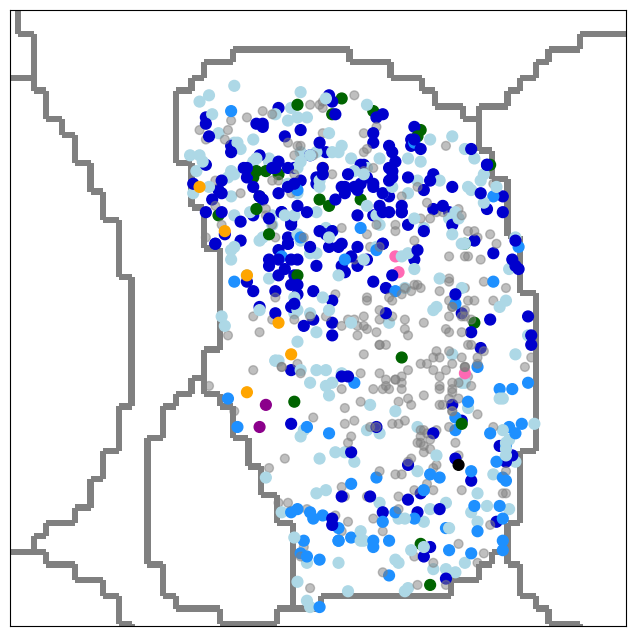

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(df_cell.y, df_cell.x, c=df_cell.colors, s=df_cell.sizes, alpha=df_cell.alphas)
plt.imshow(cell_bounds[40:-40,40:-40]*-1, cmap='gray', vmin=-2)
plt.xlim([1140-195,1140])
plt.ylim([780,780-195])
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
cell_id = 88
diff = 20
df_cell = pd.DataFrame(columns=results.columns)
for i in range(len(results)):
    x = results.loc[i,'x']+40
    y = results.loc[i,'y']+40
    if segmentation[x,y]==cell_id:
        df_cell.loc[len(df_cell)] = results.loc[i]
        
color_list = []
size_list = []
alpha_list = []
for i in range(len(df_cell)):
    name = df_cell.loc[i, 'predicted_name']
    if name in colors:
        color_list.append(colors[name])
        size_list.append(60)
        alpha_list.append(1)
    else:
        color_list.append('gray')
        size_list.append(40)
        alpha_list.append(0.5)
        
df_cell['colors'] = color_list
df_cell['sizes'] = size_list
df_cell['alphas'] = alpha_list

df_cell

,x,y,batch_id,cell_id,probability,spot_index,predicted_id,predicted_name,source,0,...,13,14,15,16,17,18,19,colors,sizes,alphas
0,976,842,0,NaN,0.999997,614385,111,Il7r,prediction,0.00055,...,0.000944,0.000183,0.000207,0.986273,0.00002,0.000336,0.014867,gray,40,0.5
1,1018,797,0,NaN,0.998882,662426,59,Acta2,prediction,0.985622,...,0.003368,0.000107,0.00181,0.981484,0.000087,0.000189,0.007117,hotpink,60,1.0
2,943,820,0,NaN,0.999718,576903,17,Tspan13,prediction,0.000062,...,0.000908,0.00045,0.000221,0.001316,0.889254,0.000368,0.004258,gray,40,0.5
3,995,832,0,NaN,0.955848,635885,111,Il7r,prediction,0.002552,...,0.00061,0.000523,0.00235,0.976241,0.000015,0.001251,0.98465,gray,40,0.5
4,975,818,0,NaN,0.999762,613226,10,Slc12a2,prediction,0.92811,...,0.00169,0.000396,0.000212,0.01243,0.972748,0.976689,0.046938,gray,40,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,942,869,8,NaN,0.959575,11339446,89,Cd79b,prediction,0.090112,...,0.003447,0.014173,0.643438,0.904184,0.000106,0.949051,0.172825,yellowgreen,60,1.0
215,1033,911,8,NaN,0.977667,11433656,46,Net1,prediction,0.937781,...,0.010597,0.02377,0.00096,0.043141,0.033339,0.004022,0.83456,gray,40,0.5
216,962,812,8,NaN,0.979107,11359407,89,Cd79b,prediction,0.000211,...,0.05853,0.000188,0.671817,0.749936,0.000086,0.893649,0.092109,yellowgreen,60,1.0
217,942,867,8,NaN,0.951272,11339444,89,Cd79b,prediction,0.848336,...,0.002807,0.01906,0.56478,0.377481,0.000057,0.740685,0.359005,yellowgreen,60,1.0


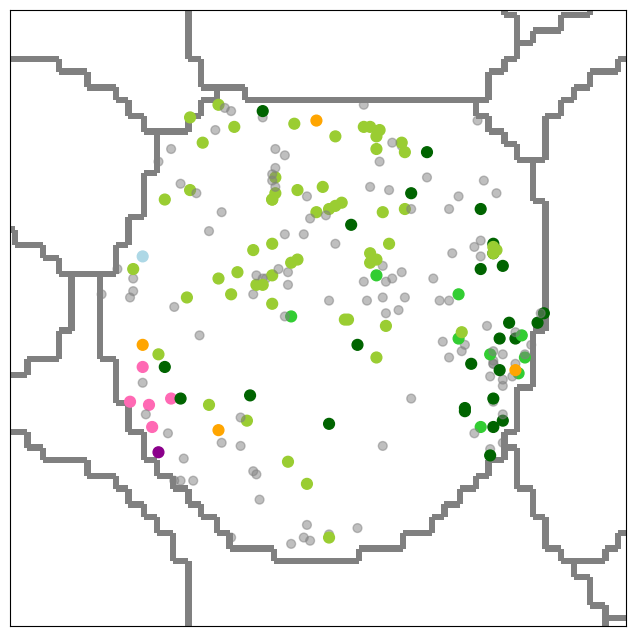

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(df_cell.y, df_cell.x, c=df_cell.colors, s=df_cell.sizes, alpha=df_cell.alphas)
plt.imshow(cell_bounds[40:-40,40:-40]*-1, cmap='gray', vmin=-2)
plt.xlim([950-195,950])
plt.ylim([1100,1100-195])
plt.xticks([])
plt.yticks([])
plt.show()